#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


#### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### Preparing the input data to neural network

In [7]:
df = raw_df.copy()

In [8]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [9]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [10]:
X = np.array(df)
Y_linear = np.array(raw_df['cases']).reshape(X.shape[0], 1)


In [11]:
print(X.shape)
print(Y_linear.shape)

(602, 20)
(602, 1)


#### Spliting dataset into train  dev and test sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_linear, test_size=0.3, random_state=42)

In [13]:
X_dev_, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

#### Normalizing inputs

In [14]:
X_mean = np.mean(X_train,  axis=0, keepdims=True)
X_dev = np.std(X_train, axis=0, keepdims=True)

In [15]:
X_train = (X_train-X_mean)/X_dev
X_train[:1,:]

array([[-0.3153459 ,  0.52442687, -0.14897567,  0.59901433,  0.11854252,
         0.00627622,  0.89043439,  1.42371925,  1.13709605,  0.67620327,
         0.21132408, -0.33143443, -0.86594917, -0.12238367,  0.8091319 ,
        -0.53908097, -0.55545085, -0.56680802, -0.98836085,  0.18618026]])

In [16]:
X_development = (X_dev_-X_mean)/X_dev
X_development[:1,:]

array([[ 0.65997314, -0.18924305,  0.05610572,  0.0723754 , -0.35780477,
        -0.29046312, -0.37378142, -0.59574256, -0.4406535 ,  0.67620327,
         0.77402431, -0.8191061 ,  1.66706419, -0.04326152,  0.57630207,
        -0.83323967,  0.0950825 ,  0.08680913,  0.67140407,  1.8219068 ]])

In [17]:
X_test = (X_test-X_mean)/X_dev
X_test[:1,:]

array([[-0.09027227, -0.26061004, -0.39507334, -0.05401794, -0.40543949,
        -0.5660068 , -0.02261036,  0.3765909 , -0.22478435,  0.67620327,
        -0.07036379, -0.61960405,  0.42484335, -0.00674361, -0.4595531 ,
        -0.83323967,  0.90414919,  0.88801725,  0.67140407,  1.8219068 ]])

In [18]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Transposing the matrices so that each matrix column contains a single training example

In [19]:
X_train = X_train.T
X_development = X_development.T
X_test = X_test.T

In [20]:
Y_train = Y_train.T
Y_dev = Y_dev.T
Y_test = Y_test.T

In [21]:
Y_dev.shape

(1, 90)

### Training a model to predict Actual output

In [22]:
linear_model = NN(input_size=X_train.shape[0], architecture=[2,2,1], activations=['Leaky_ReLU', 'Leaky_ReLU', 'Linear'], loss="MSE")

In [23]:
def model_train(model, num_epochs=10000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train, learning_rate=learning_rate)
        train_losses.append(train_loss[0])
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev)
            dev_losses.append(dev_loss[0])
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [24]:
train_loss, dev_loss = model_train(model=linear_model, learning_rate=1.5, num_epochs=15000)


Epoch 0: Train Loss = [60928163.03105132], Dev Loss = [54011751.56045751]
Epoch 1000: Train Loss = [60919986.24228028], Dev Loss = [54005516.11111111]
Epoch 2000: Train Loss = [60919636.78147268], Dev Loss = [54004709.95555556]
Epoch 3000: Train Loss = [60919585.01306413], Dev Loss = [54004698.98333333]
Epoch 4000: Train Loss = [60919553.59738717], Dev Loss = [54004594.42222222]
Epoch 5000: Train Loss = [60919533.71496437], Dev Loss = [54004594.42222222]
Epoch 6000: Train Loss = [60919527.03206651], Dev Loss = [54004594.42222222]
Epoch 7000: Train Loss = [60919516.67458432], Dev Loss = [54004508.34444445]
Epoch 8000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 9000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 10000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 11000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 12000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]

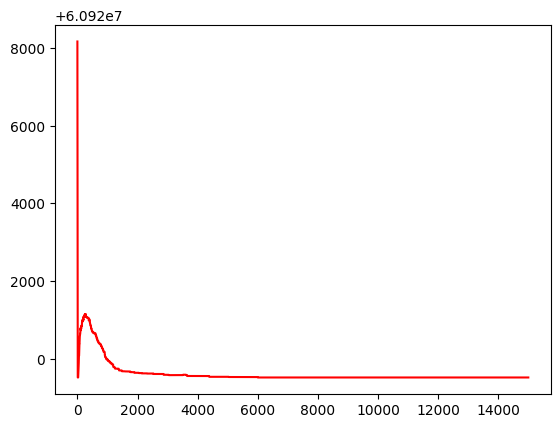

In [25]:
plt.plot(train_loss, c='r')

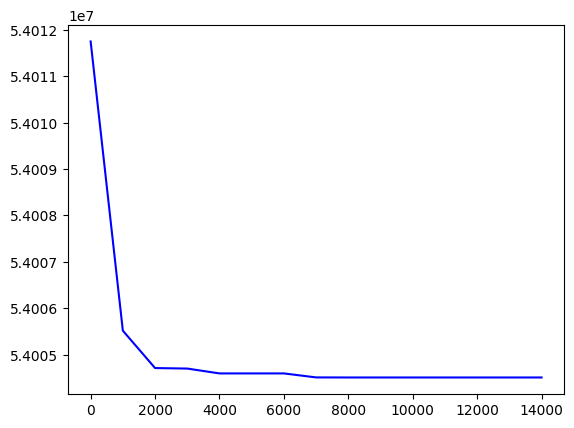

In [26]:
plt.plot(range(1,15001, 1000), dev_loss, c='b')

In [27]:
loss, pred = linear_model.evaluate(X_test, Y_test)

In [28]:
pred

array([[ 3004.70585009,  9322.99847334,  4854.65575553, 11649.56889203,
         6727.17324048, 12650.6758855 , 15491.20077343,  8159.44468407,
        11884.89320525, 10107.25012673, 11175.8896011 ,  3363.29234753,
        11753.18354107,  3651.56335012,  4535.59732285,  2019.71811076,
        13020.12019068,  5370.37652691,  1572.25161247,   112.93732086,
         9349.49712423,  4455.55118446,  7020.4990416 ,  9160.7487422 ,
        13065.72208988, 10139.08629994,  2571.04376084,  4023.42190115,
         3905.27854677, 15268.56074898, 15686.68917044,  6231.12572698,
         5842.61032943,  9793.20040104,  9023.68318478, 13096.54473031,
         6310.72163779,  9170.26857551, 10867.79243239,  2540.46018756,
         7246.42839674,  4864.51429052,  6666.92740783,  3756.72785539,
         2955.0722963 ,  2962.42040947, 12575.30471882, 12045.48567496,
         2857.87701198, 14983.00914424,  8402.82886198,  4085.62758597,
         7663.08534818,  9222.75248317,  8859.23334063,   166.05

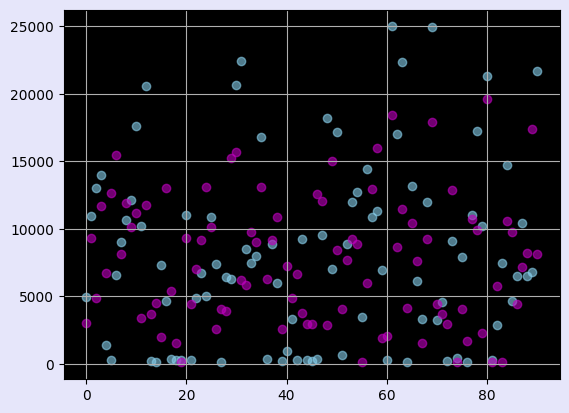

In [29]:
data = Y_test.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [30]:
for i in linear_model.grads:
    print(i)
    print(linear_model.grads[i])

dW3
[[1. 1.]]
db3
[[-1.]]
dW2
[[-1.  1.]
 [-1.  1.]]
db2
[[1.]
 [1.]]
dW1
[[-1.          1.          1.         -1.          1.          1.
   1.          1.         -1.          1.         -1.          1.
   1.          0.41714989 -1.          1.          1.          1.
   1.         -1.        ]
 [-1.         -1.         -0.33060944  1.         -1.          1.
   1.         -1.          1.          1.          1.         -0.34498346
  -1.          1.          1.         -1.         -1.         -1.
  -1.         -1.        ]]
db1
[[-1.]
 [ 1.]]


In [31]:
for i in linear_model.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[  7.38100343  16.89038603 -17.60563496 -19.85431608 -16.44156782
   12.38894464   3.94038967 -28.13347781 -24.70450098  -0.15666947
  -16.02903631   4.78690696  11.72804971 -10.26433903   7.92218082
  -24.12221584  13.32104248   7.84479649  19.89401086 -19.41712328]
 [ 21.53496766  31.09733317  17.25705235   3.26073242 -18.04855593
  -22.79865165  43.23024398  13.7452525    6.7687932   25.21419611
  -15.64181678  13.55729513 -15.03704302  16.40535892 -29.37392582
    7.83371521 -12.21188604 -12.38255078 -11.27939067 -48.09887908]]
b1
[[64.07982171]
 [72.33452626]]
W2
[[-28.14379701 -51.68489531]
 [-28.14199465 -51.64528015]]
b2
[[-75.18481923]
 [-75.18481923]]
W3
[[-64.95828594 -64.73336878]]
b3
[[75.18481923]]


### Training another model to predict scaled down output

#### Scaling down our output

In [32]:
Y_train_scaled = np.power(Y_train, 0.02)
Y = np.arange(len(Y_train))
print(Y.shape)
print(Y_train.shape)
# plt.scatter(Y, Y_l_train_)
# Y_l_dev[0]


(1,)
(1, 421)


In [33]:
Y_dev_scaled = np.power(Y_dev, 0.02)

In [34]:
Y_dev_scaled.shape

(1, 90)

#### Creating Model

In [35]:
linear_model_2 = NN(input_size=X_train.shape[0], architecture=[2,2,1], activations=['Leaky_ReLU', 'Leaky_ReLU', 'Linear'], loss="MSE")


In [36]:
def model_train_scaled (model, num_epochs=10000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train_scaled, learning_rate=learning_rate)
        train_losses.append(train_loss[0])
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev_scaled)
            dev_losses.append(dev_loss[0])
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [37]:
train_loss, dev_loss = model_train_scaled(model=linear_model_2, learning_rate=0.1, num_epochs=15000)


Epoch 0: Train Loss = [0.69945807], Dev Loss = [0.69542956]
Epoch 1000: Train Loss = [0.02911218], Dev Loss = [0.02911094]
Epoch 2000: Train Loss = [0.02160978], Dev Loss = [0.02152681]
Epoch 3000: Train Loss = [0.01925654], Dev Loss = [0.01897961]
Epoch 4000: Train Loss = [0.01809508], Dev Loss = [0.01780458]
Epoch 5000: Train Loss = [0.01744079], Dev Loss = [0.01721584]
Epoch 6000: Train Loss = [0.01732271], Dev Loss = [0.0171534]
Epoch 7000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 8000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 9000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 10000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 11000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 12000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 13000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 14000: Train Loss = [0.01732189], Dev Loss = [0.0171534]


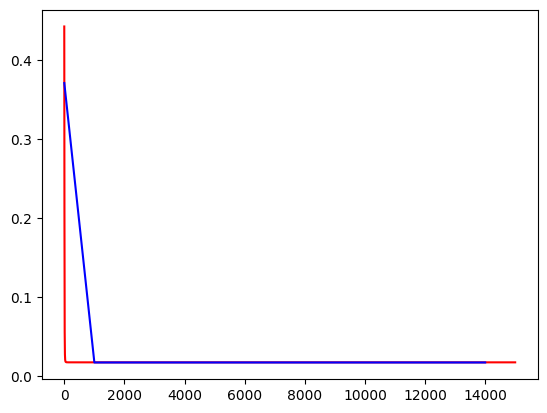

In [55]:
plt.plot(train_loss, c='r')
plt.plot(range(1,15001, 1000), dev_loss, c='b')


#### Evaluating the model

In [40]:
Y_test_scaled = np.power(Y_test, 0.02)

In [41]:
loss, pred = linear_model_2.evaluate(X_test, Y_test_scaled)

In [42]:
pred

array([[1.11945037, 1.21141914, 1.0590369 , 1.1676245 , 1.05051039,
        1.051968  , 1.06159935, 1.05360005, 1.05132611, 1.13024043,
        1.07702473, 1.05262692, 1.25251824, 1.08943896, 1.09693504,
        1.08796328, 1.1546258 , 1.19788821, 1.07398132, 1.2234495 ,
        1.14469036, 1.12606028, 1.05183961, 1.07192291, 1.05170422,
        1.1249442 , 1.125762  , 1.10830885, 1.13387111, 1.06544629,
        1.08773703, 1.05115051, 1.20223924, 1.17181893, 1.11791659,
        1.12476875, 1.1894536 , 1.18245001, 1.13882457, 1.09800673,
        1.0510868 , 1.13876387, 1.18411381, 1.05277428, 1.13206489,
        1.05920535, 1.0522679 , 1.09063371, 1.15454889, 1.0667851 ,
        1.10293887, 1.14597696, 1.14986736, 1.18577158, 1.22589747,
        1.24564236, 1.05316812, 1.05256004, 1.11570092, 1.19189682,
        1.09207498, 1.2406035 , 1.18768977, 1.0861488 , 1.10228781,
        1.12535033, 1.22100153, 1.18720092, 1.16068749, 1.12437024,
        1.05149955, 1.05334711, 1.11642097, 1.11

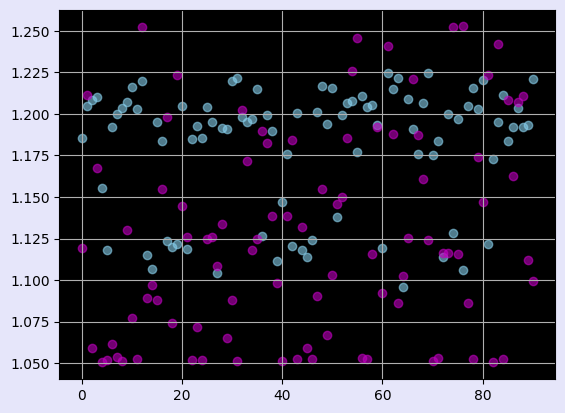

In [43]:
data = Y_test_scaled.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [44]:
for i in linear_model_2.grads:
    print(i)
    print(linear_model.grads[i])

dW3
[[1. 1.]]
db3
[[-1.]]
dW2
[[-1.  1.]
 [-1.  1.]]
db2
[[1.]
 [1.]]
dW1
[[-1.          1.          1.         -1.          1.          1.
   1.          1.         -1.          1.         -1.          1.
   1.          0.41714989 -1.          1.          1.          1.
   1.         -1.        ]
 [-1.         -1.         -0.33060944  1.         -1.          1.
   1.         -1.          1.          1.          1.         -0.34498346
  -1.          1.          1.         -1.         -1.         -1.
  -1.         -1.        ]]
db1
[[-1.]
 [ 1.]]


In [45]:
for i in linear_model_2.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[  7.38100343  16.89038603 -17.60563496 -19.85431608 -16.44156782
   12.38894464   3.94038967 -28.13347781 -24.70450098  -0.15666947
  -16.02903631   4.78690696  11.72804971 -10.26433903   7.92218082
  -24.12221584  13.32104248   7.84479649  19.89401086 -19.41712328]
 [ 21.53496766  31.09733317  17.25705235   3.26073242 -18.04855593
  -22.79865165  43.23024398  13.7452525    6.7687932   25.21419611
  -15.64181678  13.55729513 -15.03704302  16.40535892 -29.37392582
    7.83371521 -12.21188604 -12.38255078 -11.27939067 -48.09887908]]
b1
[[64.07982171]
 [72.33452626]]
W2
[[-28.14379701 -51.68489531]
 [-28.14199465 -51.64528015]]
b2
[[-75.18481923]
 [-75.18481923]]
W3
[[-64.95828594 -64.73336878]]
b3
[[75.18481923]]


#### Training a simple 1 neuron linear regressor

In [46]:
linear_regressor = NN(input_size=X_train.shape[0], architecture=[1], activations=['Linear'], loss="MSE")


In [47]:
train_loss, dev_loss = model_train_scaled(model=linear_regressor, learning_rate=1.5, num_epochs=15000)


Epoch 0: Train Loss = [0.44255072], Dev Loss = [0.37093369]
Epoch 1000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 2000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 3000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 4000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 5000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 6000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 7000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 8000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 9000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 10000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 11000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 12000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 13000: Train Loss = [0.01732189], Dev Loss = [0.0171534]
Epoch 14000: Train Loss = [0.01732189], Dev Loss = [0.0171534]


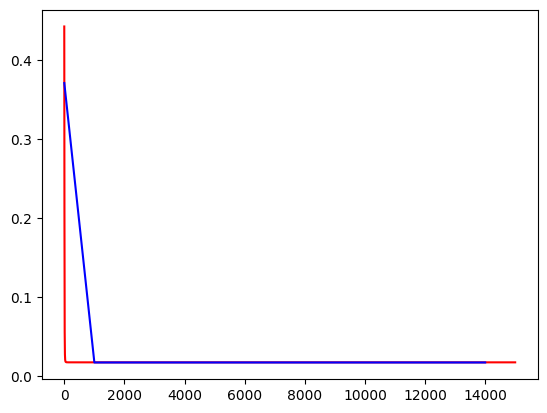

In [56]:
plt.plot(train_loss, c='r')
plt.plot(range(1,15001, 1000), dev_loss, c='b')


In [50]:
loss, pred = linear_regressor.evaluate(X_test, Y_test_scaled)

In [51]:
loss

array([0.01698217])

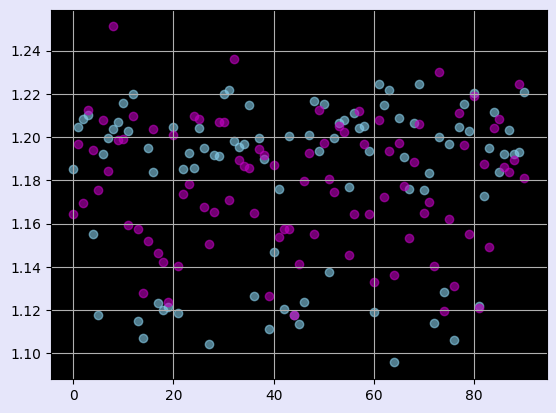

In [52]:
data = Y_test_scaled.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [53]:
for i in linear_regressor.grads:
    print(i)
    print(linear_regressor.grads[i])

dW1
[[ 8.32045732e-05  4.62725097e-04 -9.56131812e-05  8.82556312e-05
  -1.67293208e-04 -4.26943689e-05 -3.61737009e-04  2.11371717e-04
  -9.54091842e-06  4.71255883e-06 -1.19372943e-05 -3.45202473e-06
  -3.79620554e-06 -5.79525428e-08 -4.38043663e-06 -1.34801064e-05
   4.99008501e-05  5.91337889e-05 -8.97151984e-05 -2.50122024e-05]]
db1
[[-7.18538727e-15]]


In [54]:
for i in linear_regressor.parameters:
    print(i)
    print(linear_regressor.parameters[i])

W1
[[-0.0027242   0.05426453  0.03401316  0.00312807 -0.03175937  0.04138756
  -0.10052059  0.06485879  0.00058374 -0.0020846  -0.00513593  0.00683937
  -0.00051954 -0.00270093 -0.01415409 -0.0051776   0.04145615 -0.04027069
  -0.00872363 -0.00400352]]
b1
[[1.1821444]]
